In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sklearn
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance

In [4]:
os.chdir('C:\\Users\\oso_p\\Documents\\Oso_Tec\\2do_semestre\\semana_tec_2\\reto4')

In [3]:
os.getcwd()

'C:\\Users\\oso_p\\Documents\\Oso_Tec\\2do_semestre\\semana_tec_2\\reto4'

In [5]:
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
print(dataframe.groupby('year').size())

year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64


C:\Users\oso_p\AppData\Local\Temp\ipykernel_11444\83471621.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['year'],1).hist()


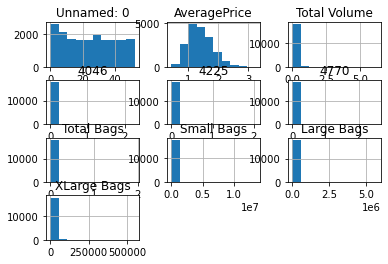

In [9]:
dataframe.drop(['year'],1).hist()
plt.show()

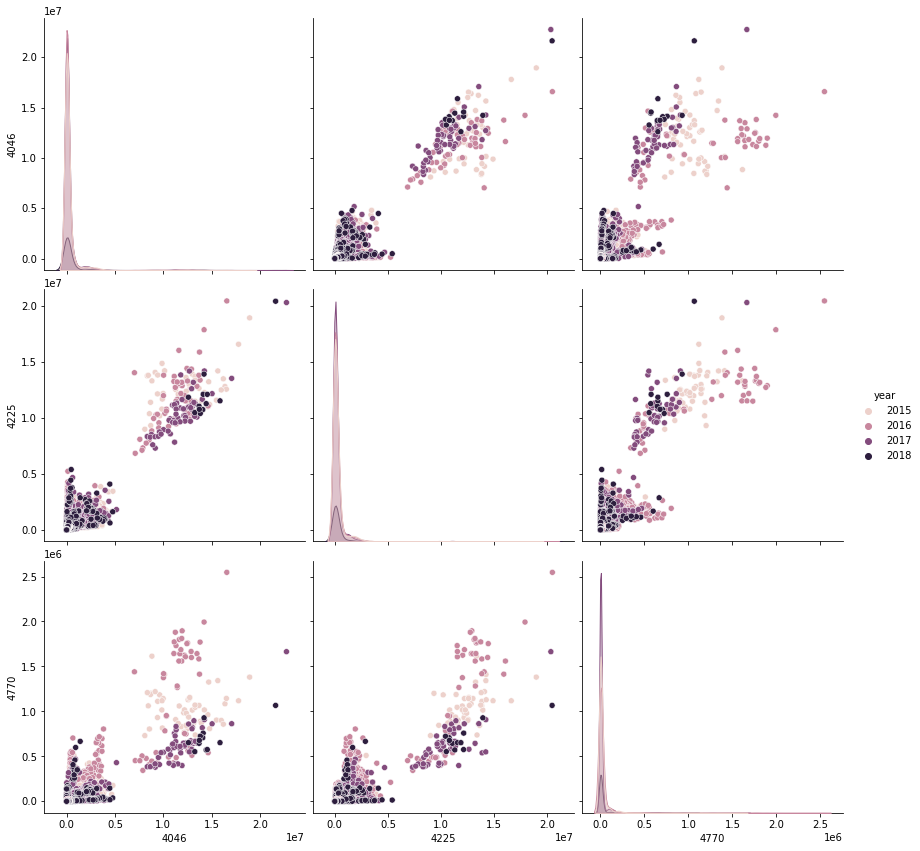

In [10]:
sb.pairplot(dataframe.dropna(), hue='year',height=4,vars=["4046","4225","4770"],kind='scatter')

In [11]:
X = np.array(dataframe[["4046","4225","4770"]])
y = np.array(dataframe['year'])
X.shape
1
2
3
X = np.array(dataframe[["4046","4225","4770"]])
y = np.array(dataframe['year'])
X.shape

(18249, 3)

In [25]:
print(leny)

18249


[2015 2015 2015 ... 2018 2018 2018]


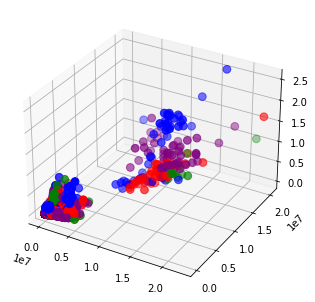

In [11]:
X = np.array(dataframe[["4046","4225","4770"]])
y = np.array(dataframe['year'])
print(y)
X.shape
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

colores=['blue','red','green','purple','cyan','yellow','black']
asignar=[]
for row in y:
    asignar.append(colores[row%4])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

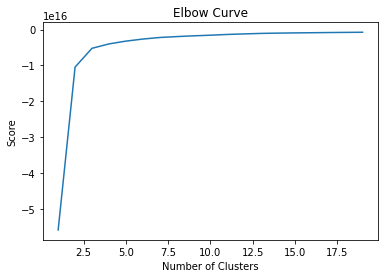

In [33]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.80864645e+04 8.51598624e+04 6.13188476e+03]
 [1.01580686e+07 1.00811599e+07 7.07269179e+05]
 [2.44250227e+06 1.32287860e+06 1.12288922e+05]
 [1.34893691e+07 1.28385585e+07 1.08740193e+06]
 [4.77029138e+05 1.79097825e+06 1.34054229e+05]]


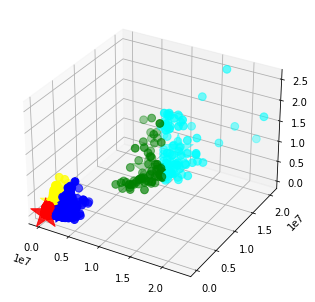

In [35]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

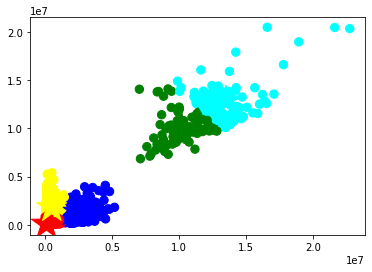

In [37]:
# Getting the values and plotting it
f1 = dataframe['4046'].values
f2 = dataframe['4225'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

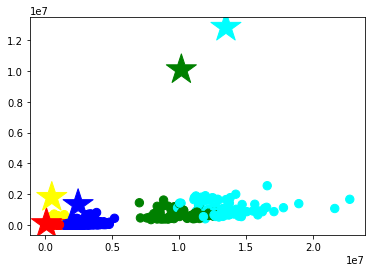

In [38]:
f1 = dataframe['4046'].values
f2 = dataframe['4770'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

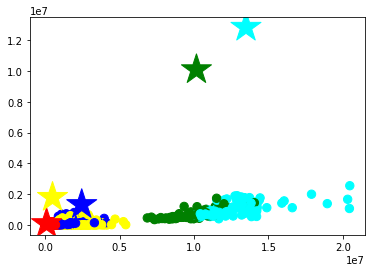

In [39]:
f1 = dataframe['4225'].values
f2 = dataframe['4770'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [40]:
copy =  pd.DataFrame()
copy['AveragePrice']=dataframe['AveragePrice'].values
copy['Total Volume']=dataframe['Total Volume'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16783
1,green,75
2,blue,706
3,cyan,94
4,yellow,591


In [41]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([7586, 5481, 5527, 2692, 4156], dtype=int64)

In [42]:
users=dataframe['region'].values
for row in closest:
    print(users[row])

RaleighGreensboro
TotalUS
West
TotalUS
Midsouth
